In [3]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
from labellines import labelLine, labelLines
import os
import re
import csv

In [8]:
#Mixture Averaged

#CH3F
vol_frac_CH3F = [0.08, 0.0825, 0.085, 0.08750000000000001, 0.09000000000000001, 0.09250000000000001, 0.09500000000000001, 0.09750000000000002, 0.10000000000000002, 0.10250000000000002, 0.10500000000000002, 0.10750000000000003, 0.11000000000000003, 0.11250000000000003, 0.11500000000000003, 0.11750000000000003, 0.12000000000000004, 0.12250000000000004, 0.12500000000000003, 0.12750000000000003, 0.13000000000000003, 0.13250000000000003, 0.13500000000000004, 0.13750000000000004, 0.14000000000000004, 0.14250000000000004, 0.14500000000000005, 0.14750000000000005, 0.15000000000000005, 0.15250000000000005, 0.15500000000000005, 0.15750000000000006, 0.16000000000000006, 0.16250000000000006, 0.16500000000000006, 0.16750000000000007, 0.17000000000000007, 0.17250000000000007, 0.17500000000000007, 0.17750000000000007, 0.18000000000000008, 0.18250000000000008, 0.18500000000000008, 0.18750000000000008, 0.19000000000000009, 0.1925000000000001, 0.1950000000000001, 0.1975000000000001, 0.2000000000000001, 0.2025000000000001, 0.2050000000000001, 0.2075000000000001, 0.2100000000000001, 0.2125000000000001, 0.2150000000000001, 0.2175000000000001, 0.2200000000000001, 0.22250000000000011]
raw_Su_CH3F = [0.07102348708820841, 0.07885044112975169, 0.08694214120120129, 0.09515972619481801, 0.10336846988411262, 0.11100268747695093, 0.11896737749019949, 0.12688802331618113, 0.1346167785501399, 0.142014200789978, 0.14927602661765382, 0.15588832442622735, 0.16204294890238088, 0.1678181727351206, 0.1731391295378645, 0.1777048356611616, 0.1818416345984227, 0.1851184546642231, 0.18724187672169706, 0.1889811114724032, 0.1898402112033235, 0.18974871601627707, 0.18860388148082785, 0.18656750982431172, 0.1842318723908615, 0.18030130883961867, 0.17553790312455197, 0.16992532927480367, 0.16351246994886706, 0.15640116495797657, 0.1494605556393927, 0.14214481599622159, 0.13488848839913614, 0.12792792992463697, 0.12132166757474477, 0.11492600239267307, 0.10879930827490522, 0.10342413395227298, 0.09856133652323118, 0.09407577514067936, 0.09048285439260621, 0.08763835070422737, 0.08537687679044698, 0.08334338442451861, 0.08140694683399098, 0.0796238872886357, 0.07792223618012507, 0.07628638342232552, 0.07474707958855034, 0.07327213388340129, 0.07187053963899484, 0.07050203027146949, 0.06917805498164176, 0.06790992644677404, 0.06667984803475452, 0.0654716181523599, 0.06433187835655957, 0.06311299397610508]
Su_CH3F = []
for i in raw_Su_CH3F:
    Su_CH3F.append(i*100)
    
#CH4
vol_frac_CH4 = [0.05, 0.052500000000000005, 0.05500000000000001, 0.05750000000000001, 0.06000000000000001, 0.06250000000000001, 0.06500000000000002, 0.06750000000000002, 0.07000000000000002, 0.07250000000000002, 0.07500000000000002, 0.07750000000000003, 0.08000000000000003, 0.08250000000000003, 0.08500000000000003, 0.08750000000000004, 0.09000000000000004, 0.09250000000000004, 0.09500000000000004, 0.09750000000000004, 0.10000000000000005, 0.10250000000000005, 0.10500000000000005, 0.10750000000000005, 0.11000000000000006, 0.11250000000000006, 0.11500000000000006, 0.11750000000000006, 0.12000000000000006, 0.12250000000000007, 0.12500000000000006, 0.12750000000000006, 0.13000000000000006, 0.13250000000000006, 0.13500000000000006, 0.13750000000000007, 0.14000000000000007, 0.14250000000000007, 0.14500000000000007, 0.14750000000000008, 0.15000000000000008]
raw_Su_CH4 = [0.01771325720681103, 0.027748419360985606, 0.040677432028548524, 0.05617736221320902, 0.07352829469033048, 0.09275351488987282, 0.11309891449712561, 0.13480933479628182, 0.15716274948695005, 0.1802394346549307, 0.20355899143710646, 0.2265914069334389, 0.24901684667215576, 0.27111444362318526, 0.29267284901748236, 0.31213407094846923, 0.33056528267569874, 0.34759746229422045, 0.36128959315498094, 0.37173140307378266, 0.37958242544947424, 0.38407692150996353, 0.3842976166603591, 0.38019050381127883, 0.37041878109963194, 0.3569364408559094, 0.33990303614238854, 0.3174922732300121, 0.29117388893278906, 0.26258520030818816, 0.23267318498951506, 0.20144984889283407, 0.1723718656849458, 0.14723558646000645, 0.12754508643896081, 0.11220455996130349, 0.09951962085666319, 0.08805156227712682, 0.07888797177884417, 0.0704671535786858, 0.06318405393534705]
Su_CH4 = []
for i in raw_Su_CH4:
    Su_CH4.append(i*100)
    
#CH2FCHF2
vol_frac_CH2FCHF2 = [0.075, 0.0775, 0.08, 0.0825, 0.085, 0.08750000000000001, 0.09000000000000001, 0.09250000000000001, 0.09500000000000001, 0.09750000000000002, 0.10000000000000002, 0.10250000000000002, 0.10500000000000002, 0.10750000000000003, 0.11000000000000003, 0.11250000000000003, 0.11500000000000003, 0.11750000000000003, 0.12000000000000004, 0.12250000000000004, 0.12500000000000003, 0.12750000000000003, 0.13000000000000003, 0.13250000000000003, 0.13500000000000004, 0.13750000000000004, 0.14000000000000004, 0.14250000000000004, 0.14500000000000005, 0.14750000000000005]
raw_Su_CH2FCHF2 =[0.10364673951105388, 0.11286086970491768, 0.1212001776941221, 0.12865176929332095, 0.13496361313847752, 0.1407968918206702, 0.14475611083452572, 0.1472744718000342, 0.14849036121962605, 0.14831192886060254, 0.14668372527575854, 0.14387566722992373, 0.13971274232721412, 0.13427434378420114, 0.12796532195361446, 0.1209554341272098, 0.11333172431990975, 0.10499895668456294, 0.09644798521720147, 0.08780297203964034, 0.07931701301534214, 0.07141391720793518, 0.06317847735624241, 0.055244143100401946, 0.04907578419629053, 0.044716762548975, 0.040971698877918995, 0.03782767963816272, 0.03490194456502002, 0.03277916772532723]
Su_CH2FCHF2 = []
for i in raw_Su_CH2FCHF2:
    Su_CH2FCHF2.append(i*100)
    
#C2H6
vol_frac_C2H6 = [0.025, 0.0275, 0.03, 0.0325, 0.035, 0.037500000000000006, 0.04000000000000001, 0.04250000000000001, 0.04500000000000001, 0.047500000000000014, 0.05000000000000002, 0.05250000000000002, 0.05500000000000002, 0.05750000000000002, 0.060000000000000026, 0.06250000000000003, 0.06500000000000003, 0.06750000000000003, 0.07000000000000003, 0.07250000000000004, 0.07500000000000004, 0.07750000000000004, 0.08000000000000004, 0.08250000000000005, 0.08500000000000005, 0.08750000000000005, 0.09000000000000005, 0.09250000000000005, 0.09500000000000006, 0.09750000000000006, 0.10000000000000006, 0.10250000000000006, 0.10500000000000007, 0.10750000000000007, 0.11000000000000007, 0.11250000000000007, 0.11500000000000007, 0.11750000000000008, 0.12000000000000008, 0.12250000000000008, 0.12500000000000008, 0.12750000000000009, 0.1300000000000001, 0.1325000000000001, 0.1350000000000001, 0.1375000000000001, 0.1400000000000001, 0.1425000000000001, 0.1450000000000001, 0.1475000000000001, 0.1500000000000001]
raw_Su_C2H6 = [0.013498943592606632, 0.030273139012184362, 0.0575808412354101, 0.09060113048526619, 0.12596560497055945, 0.16412888936389625, 0.20302224105585887, 0.2413676117460349, 0.28043632433829285, 0.3179636300656289, 0.35345738962989787, 0.38417366701774447, 0.40988417523512666, 0.429513076106537, 0.443440154886838, 0.44827740736584787, 0.44397423667794206, 0.4302433232398837, 0.4066242554191985, 0.3734525252282868, 0.3332626145356687, 0.29024239580351835, 0.24632607736697282, 0.20616906199553925, 0.1763128282403121, 0.1515617341391526, 0.13052726516327823, 0.11280790582469126, 0.09730068219316851, 0.08445608946090563, 0.0736651576253555, 0.06465737724207733, 0.05708582379670015, 0.05058346638716995, 0.0450987044340761, 0.04050326567568176, 0.03657841135875675, 0.03316649490631587, 0.030207463032096045, 0.02767902287827376, 0.02547316338074626, 0.023576115872935805, 0.021908772268085585, 0.020514269657019062, 0.0191816680909714, 0.018023208157788028, 0.016967649813561976, 0.016074420656247076, 0.015229379658182015, 0.014473518672286325, 0.01378193249388081]
Su_C2H6 = []
for i in raw_Su_C2H6:
    Su_C2H6.append(i*100)

#CH2FCH2F
vol_frac_CH2FCH2F = [0.0375, 0.04, 0.0425, 0.045000000000000005, 0.04750000000000001, 0.05000000000000001, 0.05250000000000001, 0.055000000000000014, 0.057500000000000016, 0.06000000000000002, 0.06250000000000001, 0.06500000000000002, 0.06750000000000002, 0.07000000000000002, 0.07250000000000002, 0.07500000000000002, 0.07750000000000003, 0.08000000000000003, 0.08250000000000003, 0.08500000000000003, 0.08750000000000004, 0.09000000000000004, 0.09250000000000004, 0.09500000000000004, 0.09750000000000004, 0.10000000000000005, 0.10250000000000005, 0.10500000000000005, 0.10750000000000005, 0.11000000000000006, 0.11250000000000006, 0.11500000000000006, 0.11750000000000006, 0.12000000000000006, 0.12250000000000007, 0.12500000000000006, 0.12750000000000006, 0.13000000000000006, 0.13250000000000006, 0.13500000000000006, 0.13750000000000007, 0.14000000000000007, 0.14250000000000007, 0.14500000000000007, 0.14750000000000008]
raw_Su_CH2FCH2F = [0.027243982236530677, 0.041858065708191235, 0.05985234379037556, 0.08099997871576355, 0.10310431551713711, 0.12609067958302617, 0.15078249013281989, 0.17543863002779825, 0.20097027662395772, 0.22477322181972795, 0.2474019985601727, 0.26939072221209603, 0.28828328084249694, 0.30479782001747624, 0.3184401126513177, 0.3291424416060171, 0.33637508232221175, 0.3400706431078366, 0.3402784482873444, 0.3367912162941719, 0.32958015825897763, 0.3189594903735358, 0.3045426591147265, 0.2865982005650777, 0.26560705432488063, 0.24163572097296737, 0.2161627513867413, 0.19165164876444607, 0.1683115647430488, 0.14653175523041775, 0.12672845833750263, 0.111007661181985, 0.09858134055265451, 0.08885839528136688, 0.08051305498962064, 0.07391640643695953, 0.0683341909160654, 0.06333733845539953, 0.05892650270428449, 0.05493445557960017, 0.05147494972442109, 0.04827608114060414, 0.04535337053658981, 0.04275838532960309, 0.04041120194621854]
Su_CH2FCH2F = []
for i in raw_Su_CH2FCH2F:
    Su_CH2FCH2F.append(i*100)
    
#CH2F2
vol_frac_CH2F2 = [0.11, 0.1125, 0.115, 0.11750000000000001, 0.12000000000000001, 0.12250000000000001, 0.125, 0.1275, 0.13, 0.1325, 0.135, 0.1375, 0.14, 0.14250000000000002, 0.14500000000000002, 0.14750000000000002, 0.15000000000000002, 0.15250000000000002, 0.15500000000000003, 0.15750000000000003, 0.16000000000000003, 0.16250000000000003, 0.16500000000000004, 0.16750000000000004, 0.17000000000000004, 0.17250000000000004, 0.17500000000000004, 0.17750000000000005, 0.18000000000000005, 0.18250000000000005, 0.18500000000000005, 0.18750000000000006, 0.19000000000000006, 0.19250000000000006, 0.19500000000000006, 0.19750000000000006, 0.20000000000000007, 0.20250000000000007, 0.20500000000000007, 0.20750000000000007, 0.21000000000000008, 0.21250000000000008, 0.21500000000000008, 0.21750000000000008, 0.22000000000000008, 0.2225000000000001]
raw_Su_CH2F2 = [0.02090002210220269, 0.023107680255287404, 0.025603187920378127, 0.0280126946896392, 0.030514625768906997, 0.03322550248666669, 0.036020165574794434, 0.03884990999677566, 0.04191219713602568, 0.04495503769536513, 0.04816209496777781, 0.05204792852409462, 0.053902281423867514, 0.056711886155271854, 0.05905406317825342, 0.06167646732420714, 0.06413209086111851, 0.0661693503417274, 0.06816462999682318, 0.06993412425240332, 0.07159297437123271, 0.07292461413874791, 0.07418431743548794, 0.07502863990276935, 0.07558026086049184, 0.07586912663369785, 0.07601169122830437, 0.07575234559545259, 0.07525100158691914, 0.07450112997023728, 0.07362890340791535, 0.07248637114183665, 0.07105735185895747, 0.06938537912230196, 0.0675953030319752, 0.06558584602890616, 0.06348419502643395, 0.06127769137305697, 0.05898875595574396, 0.056623519783499665, 0.05418089549751127, 0.051723776567807675, 0.04931938140217421, 0.04681747702236555, 0.04441008139977033, 0.04232784909755836]
Su_CH2F2 = []
for i in raw_Su_CH2F2:
    Su_CH2F2.append(i*100)
    
#CH3CF3
vol_frac_CH3CF3 = [0.07, 0.07250000000000001, 0.07500000000000001, 0.07750000000000001, 0.08000000000000002, 0.08250000000000002, 0.08500000000000002, 0.08750000000000002, 0.09000000000000002, 0.09250000000000003, 0.09500000000000003, 0.09750000000000003, 0.10000000000000003, 0.10250000000000004, 0.10500000000000004, 0.10750000000000004, 0.11000000000000004, 0.11250000000000004, 0.11500000000000005, 0.11750000000000005, 0.12000000000000005, 0.12250000000000005, 0.12500000000000006, 0.12750000000000006, 0.13000000000000006, 0.13250000000000006, 0.13500000000000006, 0.13750000000000007, 0.14000000000000007, 0.14250000000000007, 0.14500000000000007, 0.14750000000000008]
raw_Su_CH3CF3 = [0.04032853805147762, 0.04647732339304186, 0.05250808892487046, 0.05800033367159627, 0.0639666949972186, 0.06975663157384683, 0.07482478754656606, 0.0783300753121451, 0.08157713675676692, 0.0837741544345917, 0.0846319590296913, 0.08444177001794063, 0.08306964148534916, 0.08034905198179093, 0.07650136223051963, 0.07157844818640675, 0.0656995942942968, 0.05908190860703548, 0.052089245069046, 0.0446875624065958, 0.03824497568795503, 0.03232967689547144, 0.025314007721299596, 0.021222634304701674, 0.01874761834093126, 0.016525955132459927, 0.014670930607141466, 0.013060689320008714, 0.011683028636337212, 0.010444709233776507, 0.009414478812947075, 0.008475819547734067]
Su_CH3CF3 = []
for i in raw_Su_CH3CF3:
    Su_CH3CF3.append(i*100)
    
#CH3CHF2
vol_frac_CH3CHF2 = [0.0375, 0.04, 0.0425, 0.045000000000000005, 0.04750000000000001, 0.05000000000000001, 0.05250000000000001, 0.055000000000000014, 0.057500000000000016, 0.06000000000000002, 0.06250000000000001, 0.06500000000000002, 0.06750000000000002, 0.07000000000000002, 0.07250000000000002, 0.07500000000000002, 0.07750000000000003, 0.08000000000000003, 0.08250000000000003, 0.08500000000000003, 0.08750000000000004, 0.09000000000000004, 0.09250000000000004, 0.09500000000000004, 0.09750000000000004, 0.10000000000000005, 0.10250000000000005, 0.10500000000000005, 0.10750000000000005, 0.11000000000000006, 0.11250000000000006, 0.11500000000000006, 0.11750000000000006, 0.12000000000000006, 0.12250000000000007, 0.12500000000000006, 0.12750000000000006, 0.13000000000000006, 0.13250000000000006, 0.13500000000000006, 0.13750000000000007, 0.14000000000000007, 0.14250000000000007, 0.14500000000000007, 0.14750000000000008]
raw_Su_CH3CHF2 = [0.0139864292180332, 0.021282925215721473, 0.031682035625333935, 0.044815487871819125, 0.06036618851534373, 0.07831978627935056, 0.09801722424911996, 0.11692983431506454, 0.13719692799797487, 0.15804691489901018, 0.1774787273298965, 0.19551228813461866, 0.21256198902381854, 0.22510512384001533, 0.23621655316809098, 0.24442878371025015, 0.24953960106822232, 0.2513375856232806, 0.24953868798061865, 0.24431532406992093, 0.2352794433191701, 0.22244400758990107, 0.20597002833196898, 0.1855545170274143, 0.16456864856144782, 0.1435457709135069, 0.122551028696124, 0.10215686665339574, 0.08251271706442584, 0.06868248214589005, 0.05885848479302677, 0.05141221455966451, 0.04597119356964319, 0.041444870216568716, 0.03783698410303933, 0.034963708998115274, 0.03233557069411142, 0.029997025656772584, 0.027937397114941514, 0.026095654203901534, 0.02444864998416349, 0.02297413391599035, 0.02167339619648545, 0.020453741123709596, 0.01942577676962185]
Su_CH3CHF2 = []
for i in raw_Su_CH3CHF2:
    Su_CH3CHF2.append(i*100)

        
#C2H5F
vol_frac_C2H5F = [0.025, 0.0275, 0.03, 0.0325, 0.035, 0.037500000000000006, 0.04000000000000001, 0.04250000000000001, 0.04500000000000001, 0.047500000000000014, 0.05000000000000002, 0.05250000000000002, 0.05500000000000002, 0.05750000000000002, 0.060000000000000026, 0.06250000000000003, 0.06500000000000003, 0.06750000000000003, 0.07000000000000003, 0.07250000000000004, 0.07500000000000004, 0.07750000000000004, 0.08000000000000004, 0.08250000000000005, 0.08500000000000005, 0.08750000000000005, 0.09000000000000005, 0.09250000000000005, 0.09500000000000006, 0.09750000000000006, 0.10000000000000006, 0.10250000000000006, 0.10500000000000007, 0.10750000000000007, 0.11000000000000007, 0.11250000000000007, 0.11500000000000007, 0.11750000000000008, 0.12000000000000008, 0.12250000000000008, 0.12500000000000008, 0.12750000000000009, 0.1300000000000001, 0.1325000000000001, 0.1350000000000001, 0.1375000000000001, 0.1400000000000001, 0.1425000000000001, 0.1450000000000001, 0.1475000000000001]
raw_Su_C2H5F =[0.003846175253998682, 0.008581703912553307, 0.01821103859201447, 0.032188021710640086, 0.050139592714624016, 0.06986914988334211, 0.09337162774825757, 0.11660514233684069, 0.14231534583785346, 0.16958005010099664, 0.19771910399837095, 0.22517048074406348, 0.2520969188808785, 0.27817298192586026, 0.3019409387708455, 0.3229529391249997, 0.3400511296621463, 0.3533075218182118, 0.3617320132750302, 0.36513414928109555, 0.3623997272155627, 0.3534774195904685, 0.33804612533712386, 0.31609002329205765, 0.28822300492423314, 0.25560955382728034, 0.22250581136143896, 0.19058541347617494, 0.1614090538680693, 0.13734493683883983, 0.11912169202494155, 0.1051286616045235, 0.093547974464952, 0.08412640612639474, 0.075951374980882, 0.06925946121530496, 0.06352190459567783, 0.05850401799618043, 0.05407563760464117, 0.050032099852006795, 0.046462962434201664, 0.0432263269336079, 0.040343863981215325, 0.037731544385546836, 0.03538581953303297, 0.033250747308529734, 0.03133666327020961, 0.02960746269498222, 0.02808406295248328, 0.02670632912650763]
Su_C2H5F = []
for i in raw_Su_C2H5F:
    Su_C2H5F.append(i*100)


In [50]:

directory = './experimental_data'
d = os.path.join(directory, 'experimental_data.csv')

data = dict()

with open(d,'r') as csvfile: 
    csvreader = csv.DictReader(csvfile)

    for row in csvreader:
        formula = row['formula']
        vol_frac = row['volume_frac']
        flamespeed = row['Su (cm/s)']

        if formula not in data:
            data[formula] = ([], [])  # tuple of two lists, one for volume fractions, one for flame speeds
        data[formula][0].append(vol_frac)
        data[formula][1].append(flamespeed)
'''
fracs = []
Su = []
for tuple in data.values(): 
    fracs.append(list(map(float, tuple[0])))
    Su.append(list(map(float, tuple[1])))
    

for (volfrac,flamespeed) in zip(fracs,Su):
    print(volfrac)
    print(flamespeed)
'''


[0.15624, 0.16492, 0.1736, 0.18228, 0.19096, 0.20832, 0.22568, 0.24304]
[5.97, 6.38, 6.56, 6.71, 6.71, 6.35, 5.7, 4.68]
[0.0734, 0.0732, 0.0787, 0.0894, 0.0948, 0.0947, 0.1005, 0.112]
[8.37, 9.43, 10.77, 12.6, 12.0, 13.2, 13.2, 12.4]
[0.0897, 0.0954, 0.0952, 0.101, 0.1066, 0.1118, 0.118, 0.12368]
[6.75, 6.44, 7.01, 6.97, 6.86, 6.43, 5.55, 5.18]
[0.0589, 0.064015, 0.0695175, 0.074555, 0.080135, 0.08556, 0.09114, 0.0969525, 0.1020675]
[15.07, 18.14, 20.62, 22.34, 23.76, 23.47, 22.74, 21.2, 17.48]
[0.06417, 0.064325, 0.069285, 0.07471, 0.074865, 0.07719, 0.07719, 0.0775, 0.0802125, 0.0803675, 0.08556, 0.0859475, 0.0910625, 0.091295, 0.096875, 0.096875, 0.1023775, 0.10292, 0.10819, 0.1140025, 0.1141575, 0.119815]
[0.882, 0.945, 1.22, 1.306, 1.188, 1.259, 1.436, 1.527, 1.416, 1.365, 1.325, 1.42, 1.459, 1.53, 1.427, 1.494, 1.454, 1.399, 1.454, 1.501, 1.571, 1.504]
[0.05828, 0.0645575, 0.070525, 0.074245, 0.077035, 0.0794375, 0.0833125, 0.089745, 0.096255, 0.10292]
[11.05, 12.82, 13.92, 14.14

<IPython.core.display.Javascript object>


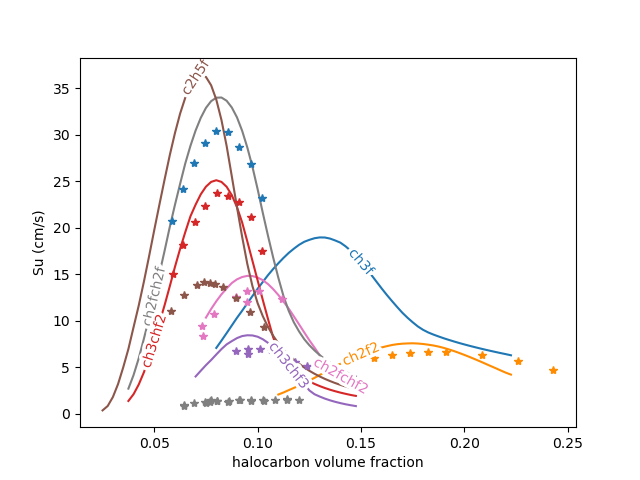

[0.15624, 0.16492, 0.1736, 0.18228, 0.19096, 0.20832, 0.22568, 0.24304]
[5.97, 6.38, 6.56, 6.71, 6.71, 6.35, 5.7, 4.68]
darkorange
[0.0734, 0.0732, 0.0787, 0.0894, 0.0948, 0.0947, 0.1005, 0.112]
[8.37, 9.43, 10.77, 12.6, 12.0, 13.2, 13.2, 12.4]
tab:pink
[0.0897, 0.0954, 0.0952, 0.101, 0.1066, 0.1118, 0.118, 0.12368]
[6.75, 6.44, 7.01, 6.97, 6.86, 6.43, 5.55, 5.18]
tab:purple
[0.0589, 0.064015, 0.0695175, 0.074555, 0.080135, 0.08556, 0.09114, 0.0969525, 0.1020675]
[15.07, 18.14, 20.62, 22.34, 23.76, 23.47, 22.74, 21.2, 17.48]
tab:red
[0.06417, 0.064325, 0.069285, 0.07471, 0.074865, 0.07719, 0.07719, 0.0775, 0.0802125, 0.0803675, 0.08556, 0.0859475, 0.0910625, 0.091295, 0.096875, 0.096875, 0.1023775, 0.10292, 0.10819, 0.1140025, 0.1141575, 0.119815]
[0.882, 0.945, 1.22, 1.306, 1.188, 1.259, 1.436, 1.527, 1.416, 1.365, 1.325, 1.42, 1.459, 1.53, 1.427, 1.494, 1.454, 1.399, 1.454, 1.501, 1.571, 1.504]
gray
[0.05828, 0.0645575, 0.070525, 0.074245, 0.077035, 0.0794375, 0.0833125, 0.089745, 0.

In [52]:
#Mixture Averaged Plot 

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(vol_frac_CH3F, Su_CH3F, '-', c='tab:blue',label='ch3f')
ax1.plot(vol_frac_CH2FCHF2, Su_CH2FCHF2, '-', c='tab:pink',label='ch2fchf2')
#ax1.plot(vol_frac_C2H6, Su_C2H6, '-', c='yellowgreen',label='c2h6')
ax1.plot(vol_frac_CH2FCH2F, Su_CH2FCH2F, '-', c='gray',label='ch2fch2f')
ax1.plot(vol_frac_CH2F2, Su_CH2F2, '-', c='darkorange', label='ch2f2' )
ax1.plot(vol_frac_CH3CHF2, Su_CH3CHF2, '-', c='tab:red',label='ch3chf2')
#ax1.plot(vol_frac_CH4, Su_CH4, '-', c='m',label='ch4')
ax1.plot(vol_frac_CH3CF3, Su_CH3CF3, '-', c='tab:purple',label='ch3chf3')
ax1.plot(vol_frac_C2H5F, Su_C2H5F, '-', c='tab:brown',label='c2h5f')


xvals = [0.150,0.050,0.050,0.150,0.050,0.115,0.07]

labelLines(ax1.get_lines(), fontsize=10, xvals=xvals)


colors = ['darkorange','tab:pink','tab:purple','tab:red','gray','tab:brown','tab:blue']


plt.xlabel('halocarbon volume fraction')
plt.ylabel('Su (cm/s)')


fracs = []
Su = []
for tuple in data.values(): 
    fracs.append(list(map(float, tuple[0])))
    Su.append(list(map(float, tuple[1])))
    

for (volfrac,flamespeed,color) in zip(fracs,Su,colors):
    print(volfrac)
    print(flamespeed)
    print(color)
    ax1.plot(volfrac,flamespeed,'*',c=color)





In [62]:
#Multicomponent Plots

#CH3F
vol_frac_CH3F_m = [0.08, 0.0825, 0.085, 0.08750000000000001, 0.09000000000000001, 0.09250000000000001, 0.09500000000000001, 0.09750000000000002, 0.10000000000000002, 0.10250000000000002, 0.10500000000000002, 0.10750000000000003, 0.11000000000000003, 0.11250000000000003, 0.11500000000000003, 0.11750000000000003, 0.12000000000000004, 0.12250000000000004, 0.12500000000000003, 0.12750000000000003, 0.13000000000000003, 0.13250000000000003, 0.13500000000000004, 0.13750000000000004, 0.14000000000000004, 0.14250000000000004, 0.14500000000000005, 0.14750000000000005, 0.15000000000000005, 0.15250000000000005, 0.15500000000000005, 0.15750000000000006, 0.16000000000000006, 0.16250000000000006, 0.16500000000000006, 0.16750000000000007, 0.17000000000000007, 0.17250000000000007, 0.17500000000000007, 0.17750000000000007, 0.18000000000000008, 0.18250000000000008, 0.18500000000000008, 0.18750000000000008, 0.19000000000000009, 0.1925000000000001, 0.1950000000000001, 0.1975000000000001, 0.2000000000000001, 0.2025000000000001, 0.2050000000000001, 0.2075000000000001, 0.2100000000000001, 0.2125000000000001, 0.2150000000000001, 0.2175000000000001, 0.2200000000000001, 0.22250000000000011]
raw_Su_CH3F_m = [0.07193734344235146, 0.07983484563944049, 0.08797428104316231, 0.0962508147077064, 0.1045317662214489, 0.112181862516089, 0.1201534615392699, 0.12807605453304766, 0.13579387658565079, 0.14318434623013077, 0.15044798257833908, 0.15700749777830073, 0.16312805852906054, 0.16887114944459508, 0.17416279224942416, 0.17868455042877449, 0.18276882513598208, 0.186009937566373, 0.1880841428951896, 0.18979244795982722, 0.1905967864586163, 0.19047866587757362, 0.18934048220655675, 0.18729679470449684, 0.18492417569375333, 0.1809766029639753, 0.17619361464559866, 0.17059036137414293, 0.16415644806956498, 0.15702753112565682, 0.1501038461030928, 0.14276393467017912, 0.13546912994781288, 0.12848913735961795, 0.12187470830951674, 0.11545566809728999, 0.10931842791072736, 0.1039137062749355, 0.09902939566568951, 0.09457224829755065, 0.09098768260021907, 0.08814643913891355, 0.08589610857469959, 0.08386101388263771, 0.08193956231181578, 0.08016098735488188, 0.07846572242074527, 0.07684133061595438, 0.07531211231055138, 0.07384950266322789, 0.0724639825368302, 0.07110818305024862, 0.06979579098974052, 0.06854049317994051, 0.06732337217631423, 0.06612722914753226, 0.06500222625203811, 0.06381449109935272]
Su_CH3F_m = []
for i in raw_Su_CH3F_m:
    Su_CH3F_m.append(i*100)
    
#CH4
vol_frac_CH4_m = [0.05, 0.052500000000000005, 0.05500000000000001, 0.05750000000000001, 0.06000000000000001, 0.06250000000000001, 0.06500000000000002, 0.06750000000000002, 0.07000000000000002, 0.07250000000000002, 0.07500000000000002, 0.07750000000000003, 0.08000000000000003, 0.08250000000000003, 0.08500000000000003, 0.08750000000000004, 0.09000000000000004, 0.09250000000000004, 0.09500000000000004, 0.09750000000000004, 0.10000000000000005, 0.10250000000000005, 0.10500000000000005, 0.10750000000000005, 0.11000000000000006, 0.11250000000000006, 0.11500000000000006, 0.11750000000000006, 0.12000000000000006, 0.12250000000000007, 0.12500000000000006, 0.12750000000000006, 0.13000000000000006, 0.13250000000000006, 0.13500000000000006, 0.13750000000000007, 0.14000000000000007, 0.14250000000000007, 0.14500000000000007, 0.14750000000000008, 0.15000000000000008]
raw_Su_CH4_m = [0.018100353261507093, 0.028377667999310102, 0.04159282859153207, 0.057391632423698595, 0.07508599199438462, 0.09461257376897142, 0.11529825812606136, 0.1372337410532687, 0.1597713633085269, 0.18312532007792104, 0.20678212651407182, 0.22973542842351968, 0.25217643522464656, 0.27421045360449237, 0.29571417020550056, 0.3151671690745421, 0.3333263519803986, 0.3501551624873177, 0.36362509776280644, 0.3738244031322859, 0.3814531423462545, 0.3857145054319836, 0.3857130836204507, 0.38135659379795317, 0.37141615103740405, 0.3576934382487393, 0.3402958907093639, 0.3177712802674917, 0.291342676743238, 0.26276461292995656, 0.23287776891803866, 0.20168702017980109, 0.17262457423193958, 0.1464074934473265, 0.1275373950318943, 0.11221268854452379, 0.09951090329753938, 0.08809441011059861, 0.07878955923876399, 0.07034066367891172, 0.0630550528709984]
Su_CH4_m = []
for i in raw_Su_CH4_m:
    Su_CH4_m.append(i*100)
    
#CH2FCHF2
vol_frac_CH2FCHF2_m = [0.075, 0.0775, 0.08, 0.0825, 0.085, 0.08750000000000001, 0.09000000000000001, 0.09250000000000001, 0.09500000000000001, 0.09750000000000002, 0.10000000000000002, 0.10250000000000002, 0.10500000000000002, 0.10750000000000003, 0.11000000000000003, 0.11250000000000003, 0.11500000000000003, 0.11750000000000003, 0.12000000000000004, 0.12250000000000004, 0.12500000000000003, 0.12750000000000003, 0.13000000000000003, 0.13250000000000003, 0.13500000000000004, 0.13750000000000004, 0.14000000000000004, 0.14250000000000004, 0.14500000000000005, 0.14750000000000005]
raw_Su_CH2FCHF2_m = [0.10367217824640303, 0.11283293509707615, 0.1211008200066012, 0.12851885585794418, 0.13477685008836562, 0.14056276677632312, 0.14448950751431752, 0.1469780258713112, 0.1481847005655038, 0.14802720561126426, 0.14639039462860315, 0.14359927944733406, 0.13948680877427713, 0.13411144189809499, 0.12783173266230122, 0.12083158620391533, 0.11329188851403008, 0.10502140725226453, 0.0965527792135047, 0.08791312295794833, 0.07951401448402322, 0.07156091177321844, 0.06331901301052326, 0.05536862498743918, 0.0491359764347929, 0.044754070978443375, 0.04104407620494223, 0.03789869903249504, 0.03497262767690781, 0.032822337085011]
Su_CH2FCHF2_m = []
for i in raw_Su_CH2FCHF2_m:
    Su_CH2FCHF2_m.append(i*100)
    
#C2H6
vol_frac_C2H6_m = [0.025, 0.0275, 0.03, 0.0325, 0.035, 0.037500000000000006, 0.04000000000000001, 0.04250000000000001, 0.04500000000000001, 0.047500000000000014, 0.05000000000000002, 0.05250000000000002, 0.05500000000000002, 0.05750000000000002, 0.060000000000000026, 0.06250000000000003, 0.06500000000000003, 0.06750000000000003, 0.07000000000000003, 0.07250000000000004, 0.07500000000000004, 0.07750000000000004, 0.08000000000000004, 0.08250000000000005, 0.08500000000000005, 0.08750000000000005, 0.09000000000000005, 0.09250000000000005, 0.09500000000000006, 0.09750000000000006, 0.10000000000000006, 0.10250000000000006, 0.10500000000000007, 0.10750000000000007, 0.11000000000000007, 0.11250000000000007, 0.11500000000000007, 0.11750000000000008, 0.12000000000000008, 0.12250000000000008, 0.12500000000000008, 0.12750000000000009, 0.1300000000000001, 0.1325000000000001, 0.1350000000000001, 0.1375000000000001, 0.1400000000000001, 0.1425000000000001, 0.1450000000000001, 0.1475000000000001, 0.1500000000000001]
raw_Su_C2H6_m = [0.013498943592606632, 0.030273139012184362, 0.0575808412354101, 0.09060113048526619, 0.12596560497055945, 0.16412888936389625, 0.20302224105585887, 0.2413676117460349, 0.28043632433829285, 0.3179636300656289, 0.35345738962989787, 0.38417366701774447, 0.40988417523512666, 0.429513076106537, 0.443440154886838, 0.44827740736584787, 0.44397423667794206, 0.4302433232398837, 0.4066242554191985, 0.3734525252282868, 0.3332626145356687, 0.29024239580351835, 0.24632607736697282, 0.20616906199553925, 0.1763128282403121, 0.1515617341391526, 0.13052726516327823, 0.11280790582469126, 0.09730068219316851, 0.08445608946090563, 0.0736651576253555, 0.06465737724207733, 0.05708582379670015, 0.05058346638716995, 0.0450987044340761, 0.04050326567568176, 0.03657841135875675, 0.03316649490631587, 0.030207463032096045, 0.02767902287827376, 0.02547316338074626, 0.023576115872935805, 0.021908772268085585, 0.020514269657019062, 0.0191816680909714, 0.018023208157788028, 0.016967649813561976, 0.016074420656247076, 0.015229379658182015, 0.014473518672286325, 0.01378193249388081]
Su_C2H6_m = []
for i in raw_Su_C2H6_m:
    Su_C2H6_m.append(i*100)
    
#CH2FCH2F
vol_frac_CH2FCH2F_m = [0.0375, 0.04, 0.0425, 0.045000000000000005, 0.04750000000000001, 0.05000000000000001, 0.05250000000000001, 0.055000000000000014, 0.057500000000000016, 0.06000000000000002, 0.06250000000000001, 0.06500000000000002, 0.06750000000000002, 0.07000000000000002, 0.07250000000000002, 0.07500000000000002, 0.07750000000000003, 0.08000000000000003, 0.08250000000000003, 0.08500000000000003, 0.08750000000000004, 0.09000000000000004, 0.09250000000000004, 0.09500000000000004, 0.09750000000000004, 0.10000000000000005, 0.10250000000000005, 0.10500000000000005, 0.10750000000000005, 0.11000000000000006, 0.11250000000000006, 0.11500000000000006, 0.11750000000000006, 0.12000000000000006, 0.12250000000000007, 0.12500000000000006, 0.12750000000000006, 0.13000000000000006, 0.13250000000000006, 0.13500000000000006, 0.13750000000000007, 0.14000000000000007, 0.14250000000000007, 0.14500000000000007, 0.14750000000000008]
raw_Su_CH2FCH2F_m = [0.02749226404965438, 0.042247977386049594, 0.06038315817809273, 0.08166220832569772, 0.10385530548278826, 0.12688948206466832, 0.15160401313452318, 0.1762501054774333, 0.20172579036341942, 0.22543423282750177, 0.2479530078352714, 0.2697281641656161, 0.28845629357426616, 0.3047738346013855, 0.3182481623718472, 0.32881039872858553, 0.33589457569517556, 0.3394610511885653, 0.3395720374917412, 0.3360273911502949, 0.32879070273644473, 0.3181631998758291, 0.30380836609203343, 0.28587597918346935, 0.26492156432960096, 0.24110705656305415, 0.21583105982567818, 0.19135543636026797, 0.16805375343761567, 0.14632532430484158, 0.12657616758237225, 0.11090998202942477, 0.09854130207343621, 0.08886747821279636, 0.08054258117710812, 0.07396902002073785, 0.06841921629603126, 0.06344108238787043, 0.05907549953215988, 0.0551110125829317, 0.051665685709306866, 0.04847347531565782, 0.045565392469320384, 0.042986254237737206, 0.04065319269269294]
Su_CH2FCH2F_m = []
for i in raw_Su_CH2FCH2F_m:
    Su_CH2FCH2F_m.append(i*100)
    
#CH3CHF2
vol_frac_CH3CHF2_m = [0.0375, 0.04, 0.0425, 0.045000000000000005, 0.04750000000000001, 0.05000000000000001, 0.05250000000000001, 0.055000000000000014, 0.057500000000000016, 0.06000000000000002, 0.06250000000000001, 0.06500000000000002, 0.06750000000000002, 0.07000000000000002, 0.07250000000000002, 0.07500000000000002, 0.07750000000000003, 0.08000000000000003, 0.08250000000000003, 0.08500000000000003, 0.08750000000000004, 0.09000000000000004, 0.09250000000000004, 0.09500000000000004, 0.09750000000000004, 0.10000000000000005, 0.10250000000000005, 0.10500000000000005, 0.10750000000000005, 0.11000000000000006, 0.11250000000000006, 0.11500000000000006, 0.11750000000000006, 0.12000000000000006, 0.12250000000000007, 0.12500000000000006, 0.12750000000000006, 0.13000000000000006, 0.13250000000000006, 0.13500000000000006, 0.13750000000000007, 0.14000000000000007, 0.14250000000000007, 0.14500000000000007, 0.14750000000000008]
raw_Su_CH3CHF2_m = [0.014159490089104413, 0.02150697337522612, 0.03199446809061481, 0.04519841421340645, 0.060869112421575354, 0.07889430685738111, 0.0986507826979191, 0.11755145469290436, 0.1378031436053557, 0.15860711524314466, 0.1779476818981931, 0.19589534587328802, 0.21284605713359886, 0.22527761193586446, 0.23631854392998508, 0.24443598529936408, 0.24947480065941105, 0.251215541263744, 0.24938815810133788, 0.24416229906912862, 0.2351461895221621, 0.22231661652172563, 0.20593423682520434, 0.18565940337853917, 0.16473218121226305, 0.14380579354113396, 0.12283086960137678, 0.10247267126523094, 0.08280383132663496, 0.06896856315432415, 0.05911759422719273, 0.05167310153183963, 0.046223908514859524, 0.041672296585633865, 0.038087028901141365, 0.03521246266591476, 0.032583139200610275, 0.030245553757520284, 0.02818859477411411, 0.02635178783787436, 0.024708860420753508, 0.02323805565869358, 0.02194261236415367, 0.020727055150467227, 0.01969663080969726]
Su_CH3CHF2_m = []
for i in raw_Su_CH3CHF2_m:
    Su_CH3CHF2_m.append(i*100)
    
#C2H5F 
vol_frac_C2H5F_m = [0.025, 0.0275, 0.03, 0.0325, 0.035, 0.037500000000000006, 0.04000000000000001, 0.04250000000000001, 0.04500000000000001, 0.047500000000000014, 0.05000000000000002, 0.05250000000000002, 0.05500000000000002, 0.05750000000000002, 0.060000000000000026, 0.06250000000000003, 0.06500000000000003, 0.06750000000000003, 0.07000000000000003, 0.07250000000000004, 0.07500000000000004, 0.07750000000000004, 0.08000000000000004, 0.08250000000000005, 0.08500000000000005, 0.08750000000000005, 0.09000000000000005, 0.09250000000000005, 0.09500000000000006, 0.09750000000000006, 0.10000000000000006, 0.10250000000000006, 0.10500000000000007, 0.10750000000000007, 0.11000000000000007, 0.11250000000000007, 0.11500000000000007, 0.11750000000000008, 0.12000000000000008, 0.12250000000000008, 0.12500000000000008, 0.12750000000000009, 0.1300000000000001, 0.1325000000000001, 0.1350000000000001, 0.1375000000000001, 0.1400000000000001, 0.1425000000000001, 0.1450000000000001, 0.1475000000000001]
raw_Su_C2H5F_m =  [0.00390921433327803, 0.008712666663310187, 0.01847869309181594, 0.032681504748334415, 0.050876085476456695, 0.07083174145950895, 0.0945580465250088, 0.11794076556629104, 0.1437450259784926, 0.1710770915780627, 0.19923086647314614, 0.22669147314642063, 0.25347944639164194, 0.27944258944936773, 0.3030659473911106, 0.32386197284857177, 0.3409062288173128, 0.3539617555654391, 0.3622253799518884, 0.3654922321793082, 0.36267441991767735, 0.35361817647376825, 0.33817796052005933, 0.3162205126810793, 0.2887299619799105, 0.2557397782131954, 0.2226671219689412, 0.19071298586415028, 0.1615288199552773, 0.13743695619186716, 0.11926012100060389, 0.10529045179465191, 0.09371728460130813, 0.08431805637711241, 0.07612045521279365, 0.06944870136619145, 0.06372574717917336, 0.05873961567439968, 0.054316809745721215, 0.05025685579895974, 0.04669932332507311, 0.04345544947734365, 0.04057540266942246, 0.03797086754376696, 0.03563804861684473, 0.03350971935212812, 0.03159626379626557, 0.029865144601061724, 0.028342142263178178, 0.026969829224431863]
Su_C2H5F_m = []
for i in raw_Su_C2H5F_m:
    Su_C2H5F_m.append(i*100)

    
#CH2F2 
vol_frac_CH2F2_m = [0.11, 0.1125, 0.115, 0.11750000000000001, 0.12000000000000001, 0.12250000000000001, 0.125, 0.1275, 0.13, 0.1325, 0.135, 0.1375, 0.14, 0.14250000000000002, 0.14500000000000002, 0.14750000000000002, 0.15000000000000002, 0.15250000000000002, 0.15500000000000003, 0.15750000000000003, 0.16000000000000003, 0.16250000000000003, 0.16500000000000004, 0.16750000000000004, 0.17000000000000004, 0.17250000000000004, 0.17500000000000004, 0.17750000000000005, 0.18000000000000005, 0.18250000000000005, 0.18500000000000005, 0.18750000000000006, 0.19000000000000006, 0.19250000000000006, 0.19500000000000006, 0.19750000000000006, 0.20000000000000007, 0.20250000000000007, 0.20500000000000007, 0.20750000000000007, 0.21000000000000008, 0.21250000000000008, 0.21500000000000008, 0.21750000000000008, 0.22000000000000008, 0.2225000000000001]
raw_Su_CH2F2_m =  [0.021190107136408367, 0.02316245627534827, 0.025676648062989686, 0.028094087204117945, 0.030616631662568835, 0.03332925986098856, 0.036141222023134675, 0.03898272302711063, 0.04205454544202864, 0.04510197549167807, 0.04830493799713326, 0.05224091077712089, 0.054086135230313026, 0.05687972716182851, 0.059216383120459556, 0.061831218994266295, 0.06428711200977404, 0.06631633080987809, 0.06830261466465855, 0.07011283761774012, 0.07177509815143923, 0.07310716623011274, 0.0743844660273837, 0.07523947392442758, 0.07578296503361064, 0.07607410243147177, 0.076225811052392, 0.07596871007755203, 0.07546971429128901, 0.0747190985513086, 0.07385782493997489, 0.07270149202818432, 0.07127979695789677, 0.0696190920119688, 0.06783250586478601, 0.06582520266641013, 0.06373198727232088, 0.061518089390249706, 0.059221470102391746, 0.05684368793356361, 0.05439410120331102, 0.051926635777372936, 0.049507958103446194, 0.04701124401789224, 0.04459194357895709, 0.04246363323747811]
Su_CH2F2_m = []
for i in raw_Su_CH2F2_m:
    Su_CH2F2_m.append(i*100)
    
#CH3CF3
volfrac_CH3CF3_m = [0.07, 0.07250000000000001, 0.07500000000000001, 0.07750000000000001, 0.08000000000000002, 0.08250000000000002, 0.08500000000000002, 0.08750000000000002, 0.09000000000000002, 0.09250000000000003, 0.09500000000000003, 0.09750000000000003, 0.10000000000000003, 0.10250000000000004, 0.10500000000000004, 0.10750000000000004, 0.11000000000000004, 0.11250000000000004, 0.11500000000000005, 0.11750000000000005, 0.12000000000000005, 0.12250000000000005, 0.12500000000000006, 0.12750000000000006, 0.13000000000000006, 0.13250000000000006, 0.13500000000000006, 0.13750000000000007, 0.14000000000000007, 0.14250000000000007, 0.14500000000000007, 0.14750000000000008]
flame_speeds_CH3CF3_m = [0.04038890310300825, 0.04651573893916257, 0.05253555575600726, 0.05801360024395722, 0.0639370062995793, 0.06970026343559624, 0.07474262078750539, 0.07823957124425913, 0.08147451021718383, 0.08364289231364952, 0.08452770780106272, 0.08434159339402704, 0.08297572362258643, 0.08031099109627791, 0.07651320827389711, 0.07162662522974914, 0.06579277212452771, 0.05920945124709698, 0.05225744065926705, 0.04486937752750971, 0.038405370550807824, 0.03246876340981752, 0.0253989584100707, 0.02126238549358092, 0.018761879710124513, 0.016544535488747212, 0.014699897313822867, 0.013097766067910547, 0.01172730830088716, 0.010498652939735788, 0.00946657881329644, 0.008529283605484453]
correct_flame_speeds_CH3CF3_m = []
for speed in flame_speeds_CH3CF3_m: 
    new_speed = lambda speed : speed*100
    correct_flame_speeds_CH3CF3_m.append(new_speed(speed))


<IPython.core.display.Javascript object>


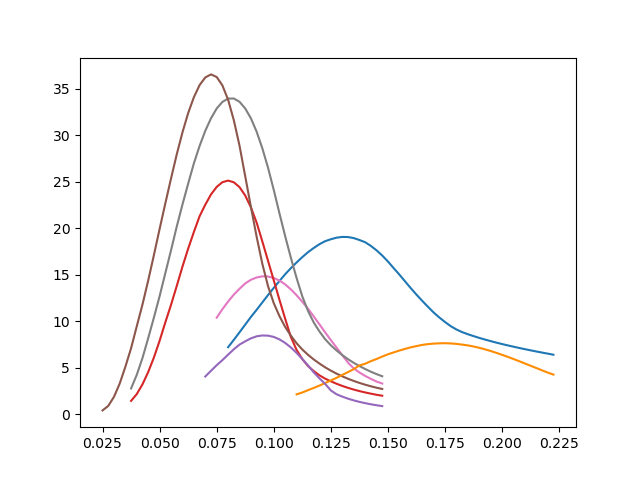

In [65]:
#Multicomponent Plot 

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(vol_frac_CH3F_m, Su_CH3F_m, '-', c='tab:blue',label='ch3f')
ax1.plot(vol_frac_CH2FCHF2_m, Su_CH2FCHF2_m, '-', c='tab:pink',label='ch2fchf2')
#ax1.plot(vol_frac_C2H6_m, Su_C2H6_m, '-', c='yellowgreen',label='c2h6')
ax1.plot(vol_frac_CH2FCH2F_m, Su_CH2FCH2F_m, '-', c='gray',label='ch2fch2f')
ax1.plot(vol_frac_CH3CHF2_m, Su_CH3CHF2_m, '-', c='tab:red',label='ch3chf2')
ax1.plot(vol_frac_C2H5F_m, Su_C2H5F_m, '-', c='tab:brown',label='c2h5f')
ax1.plot(vol_frac_CH2F2_m, Su_CH2F2_m, '-', c='darkorange',label='c2h5f')

ax1.plot(volfrac_CH3CF3_m, correct_flame_speeds_CH3CF3_m, '-', c='tab:purple',label='c2h5f')


#ax1.plot(vol_frac_CH4_m, Su_CH4_m, '-', c='m',label='ch4')
